## Importing neccessary modules

In [1]:
import pandas as pd
import numpy as np
from numpy.random import default_rng
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [12]:
wine=pd.read_csv(r"K:\Desktop\NIIT\Practice\Course9\DS2_C5_S4_Wine_Data_Practice.data")
wine.columns = ['Class','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids','Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 Of  diluted wines', 'Proline']
wine

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 Of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [13]:
wine.shape

(177, 14)

In [14]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Class                          177 non-null    int64  
 1   Alcohol                        177 non-null    float64
 2   Malic acid                     177 non-null    float64
 3   Ash                            177 non-null    float64
 4   Alcalinity of ash              177 non-null    float64
 5   Magnesium                      177 non-null    int64  
 6   Total phenols                  177 non-null    float64
 7   Flavanoids                     177 non-null    float64
 8   Nonflavanoid phenols           177 non-null    float64
 9   Proanthocyanins                177 non-null    float64
 10  Color intensity                177 non-null    float64
 11  Hue                            177 non-null    float64
 12  OD280/OD315 Of  diluted wines  177 non-null    flo

In [15]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,177.0,1.943503,0.773991,1.00,1.00,2.00,3.00,3.00
Alcohol,177.0,12.993672,0.808808,11.03,12.36,13.05,13.67,14.83
Malic acid,177.0,2.339887,1.119314,0.74,1.60,1.87,3.10,5.80
Ash,177.0,2.366158,0.275080,1.36,2.21,2.36,2.56,3.23
Alcalinity of ash,177.0,19.516949,3.336071,10.60,17.20,19.50,21.50,30.00
Magnesium,177.0,99.587571,14.174018,70.00,88.00,98.00,107.00,162.00
Total phenols,177.0,2.292260,0.626465,0.98,1.74,2.35,2.80,3.88
Flavanoids,177.0,2.023446,0.998658,0.34,1.20,2.13,2.86,5.08
Nonflavanoid phenols,177.0,0.362316,0.124653,0.13,0.27,0.34,0.44,0.66
Proanthocyanins,177.0,1.586949,0.571545,0.41,1.25,1.55,1.95,3.58


## Types of wine classes

In [16]:
wine.Class.value_counts()

2    71
1    58
3    48
Name: Class, dtype: int64

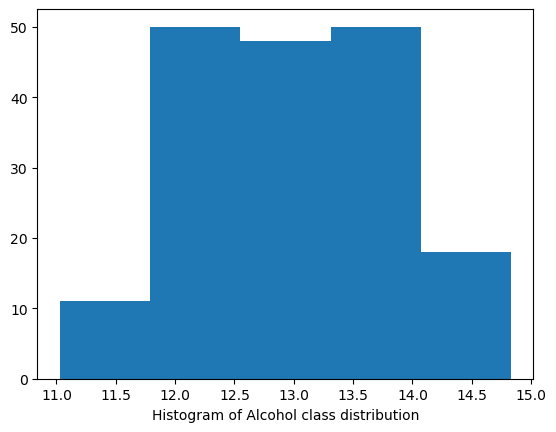

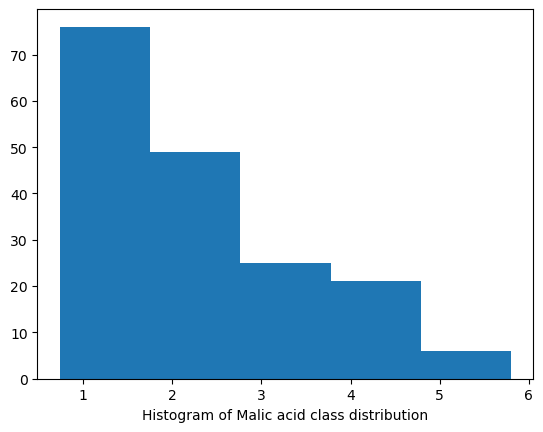

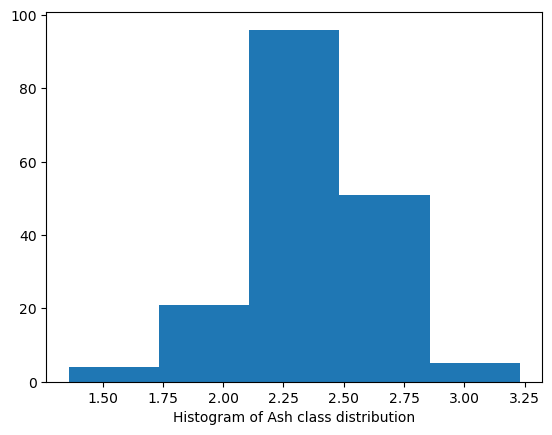

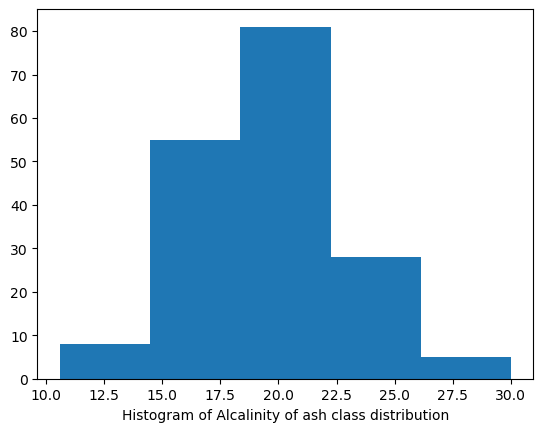

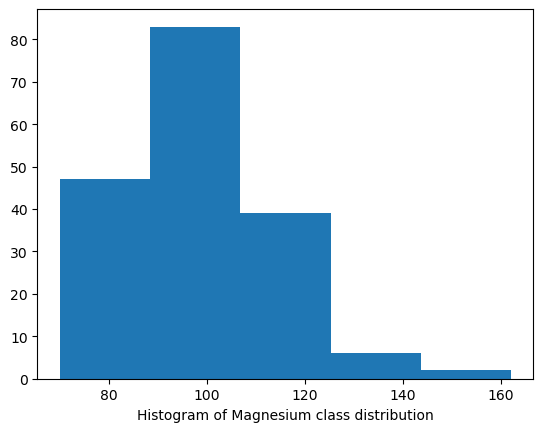

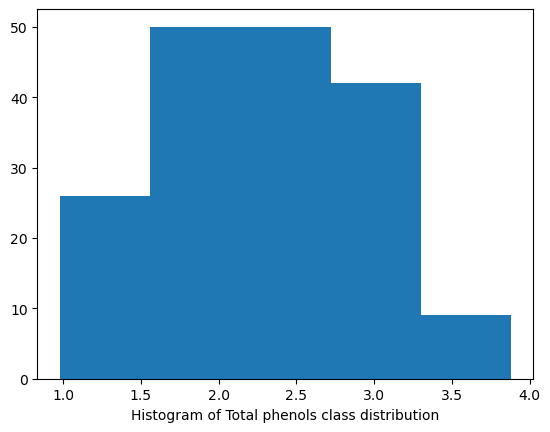

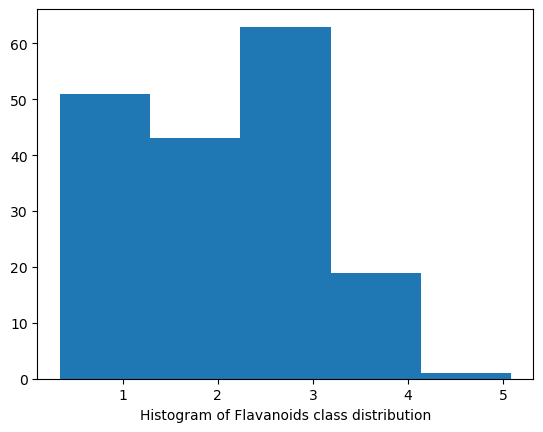

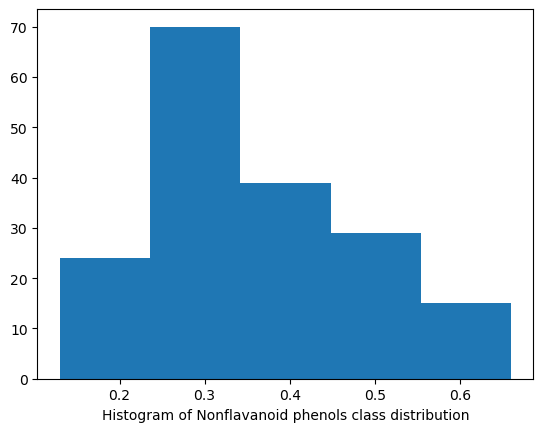

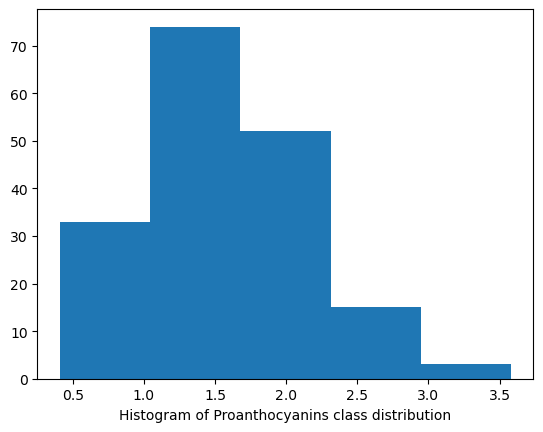

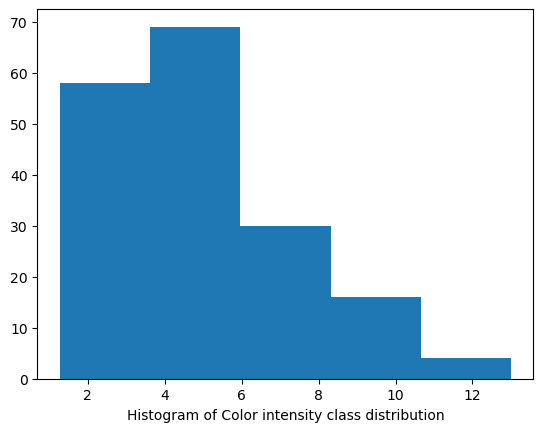

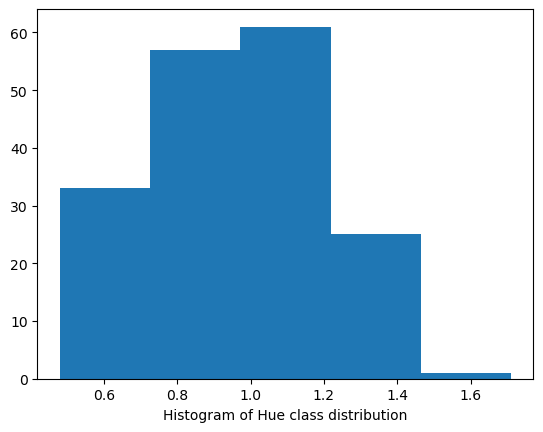

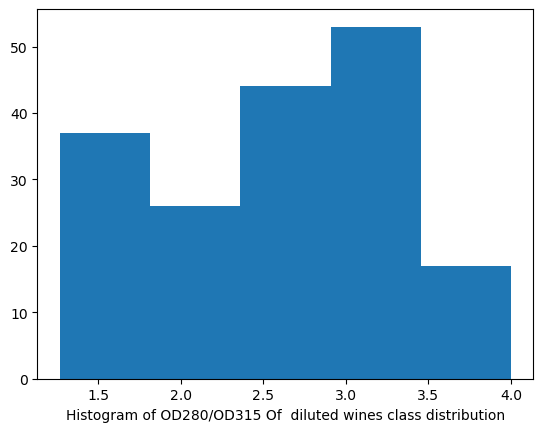

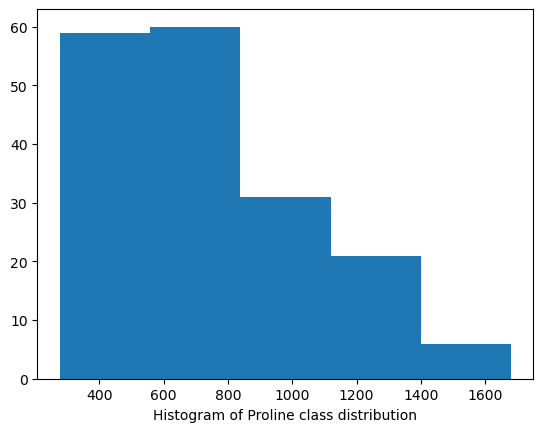

In [28]:
for item in wine.columns:
    if(item=="Class"):
        continue
    plt.hist(wine[item],bins=5)
    plt.xlabel("Histogram of {0} class distribution".format(item))
    plt.show()

### Interpretation:
From above histograms we can see that all inputs are normally distributed

In [29]:
wine.isnull().sum()

Class                            0
Alcohol                          0
Malic acid                       0
Ash                              0
Alcalinity of ash                0
Magnesium                        0
Total phenols                    0
Flavanoids                       0
Nonflavanoid phenols             0
Proanthocyanins                  0
Color intensity                  0
Hue                              0
OD280/OD315 Of  diluted wines    0
Proline                          0
dtype: int64

## Scaling std and mean

In [37]:
scaler=StandardScaler()
wine_scaled=pd.DataFrame(scaler.fit_transform(wine.iloc[:,2:]),columns=wine.columns[2:])
wine_scaled["Class"]=wine.Class

In [40]:
wine_scaled.describe().T.loc[:,["mean","std"]]

,mean,std
Malic acid,4.252719e-16,1.002837
Ash,-4.378168e-16,1.002837
Alcalinity of ash,-6.410440e-16,1.002837
Magnesium,-1.028681e-16,1.002837
Total phenols,-1.279579e-16,1.002837
Flavanoids,1.505387e-16,1.002837
Nonflavanoid phenols,-5.595022e-16,1.002837
Proanthocyanins,5.645202e-17,1.002837
Color intensity,1.568112e-16,1.002837
Hue,6.310081e-16,1.002837


In [43]:
import seaborn as sns

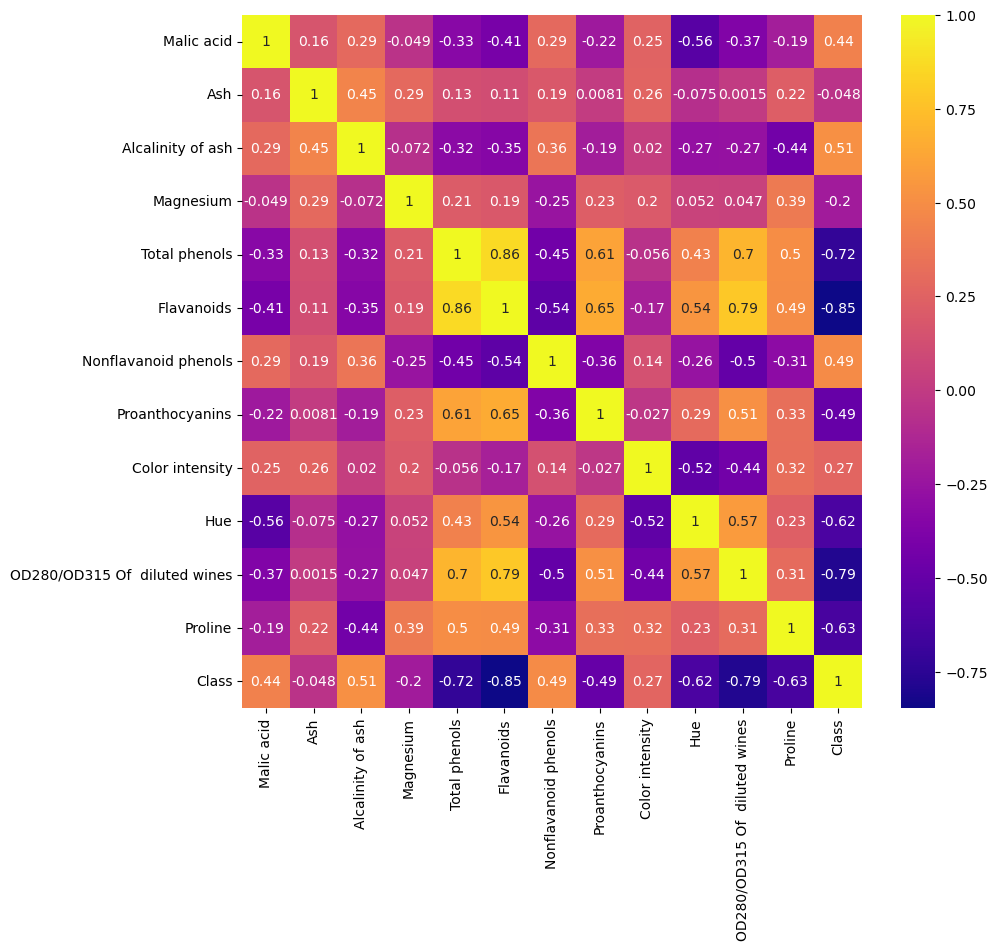

In [48]:
plt.rcParams["figure.figsize"] = (10,9)
sns.heatmap(wine_scaled.corr(),annot=True,cmap="plasma")
plt.show()

## Train test split

In [67]:
x=wine_scaled.iloc[:,:12]
y=wine_scaled.Class
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(141, 12) (36, 12) (141,) (36,)


In [73]:
classifier=GaussianNB()
classifier.fit(xtrain,ytrain)
ypred=classifier.predict(xtest)

probs=classifier.predict_proba(xtest)

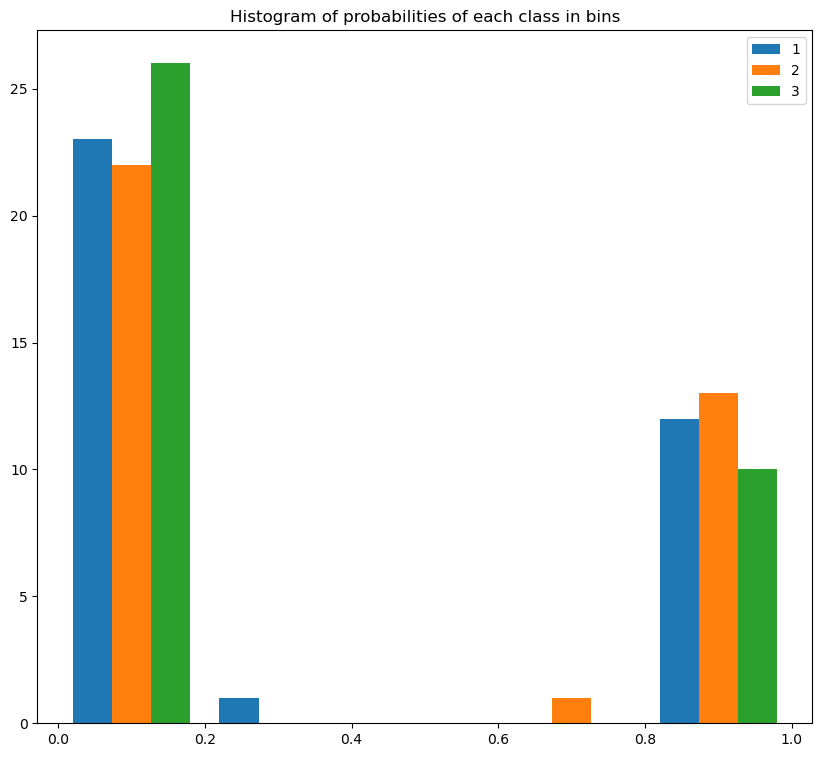

In [94]:
plt.hist(probs,bins=5,label=["1","2","3"])
plt.legend()
plt.title("Histogram of probabilities of each class in bins")
plt.show()

In [95]:
from sklearn.metrics import accuracy_score

In [108]:
print("Accuracy of xtrain and ytrain data : ",round(classifier.score(xtrain,ytrain)*100,2),"%")

Accuracy of xtrain and ytrain data :  98.58 %


In [103]:
print("Accruacy of xtest and ytest data : ",round(accuracy_score(ytest,ypred),2)*100,"%")

Accruacy of xtest and ytest data :  89.0 %


## Decision tree classifier

In [110]:
from sklearn.tree import DecisionTreeClassifier

In [178]:
classifier2 = DecisionTreeClassifier(max_depth=5)
clf = classifier2.fit(xtrain,ytrain)
y_pred = clf.predict(xtest)

In [179]:
print("Accuracy:",accuracy_score(ytest, y_pred))

Accuracy: 0.8611111111111112


In [180]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,y_pred)

array([[13,  1,  0],
       [ 0, 12,  2],
       [ 1,  1,  6]], dtype=int64)

In [181]:
# Evaluate other metrics
from sklearn.metrics import recall_score,f1_score,accuracy_score,precision_score 
print('accuracy:', accuracy_score(ytest, y_pred))
print('recall:', recall_score(ytest, y_pred, average='weighted'))
print('f1-score:', f1_score(ytest, y_pred, average='weighted'))
print('precision:', precision_score(ytest, y_pred,average="weighted"))

accuracy: 0.8611111111111112
recall: 0.8611111111111112
f1-score: 0.8611111111111112
precision: 0.8611111111111112


## Conclusion : 
The Naive Bayes Gaussian model has an accuracy, recall, f1-score, and precision of 0.86. The model performs well in classifying data, balancing precision and recall. The results indicate good generalization to unseen data and accurate predictions. However, context and further analysis may improve the model's performance.

In [182]:
features=['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids','Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 Of  diluted wines', 'Proline']

Text(0.5, 1.0, 'Decision Tree of sklearn')

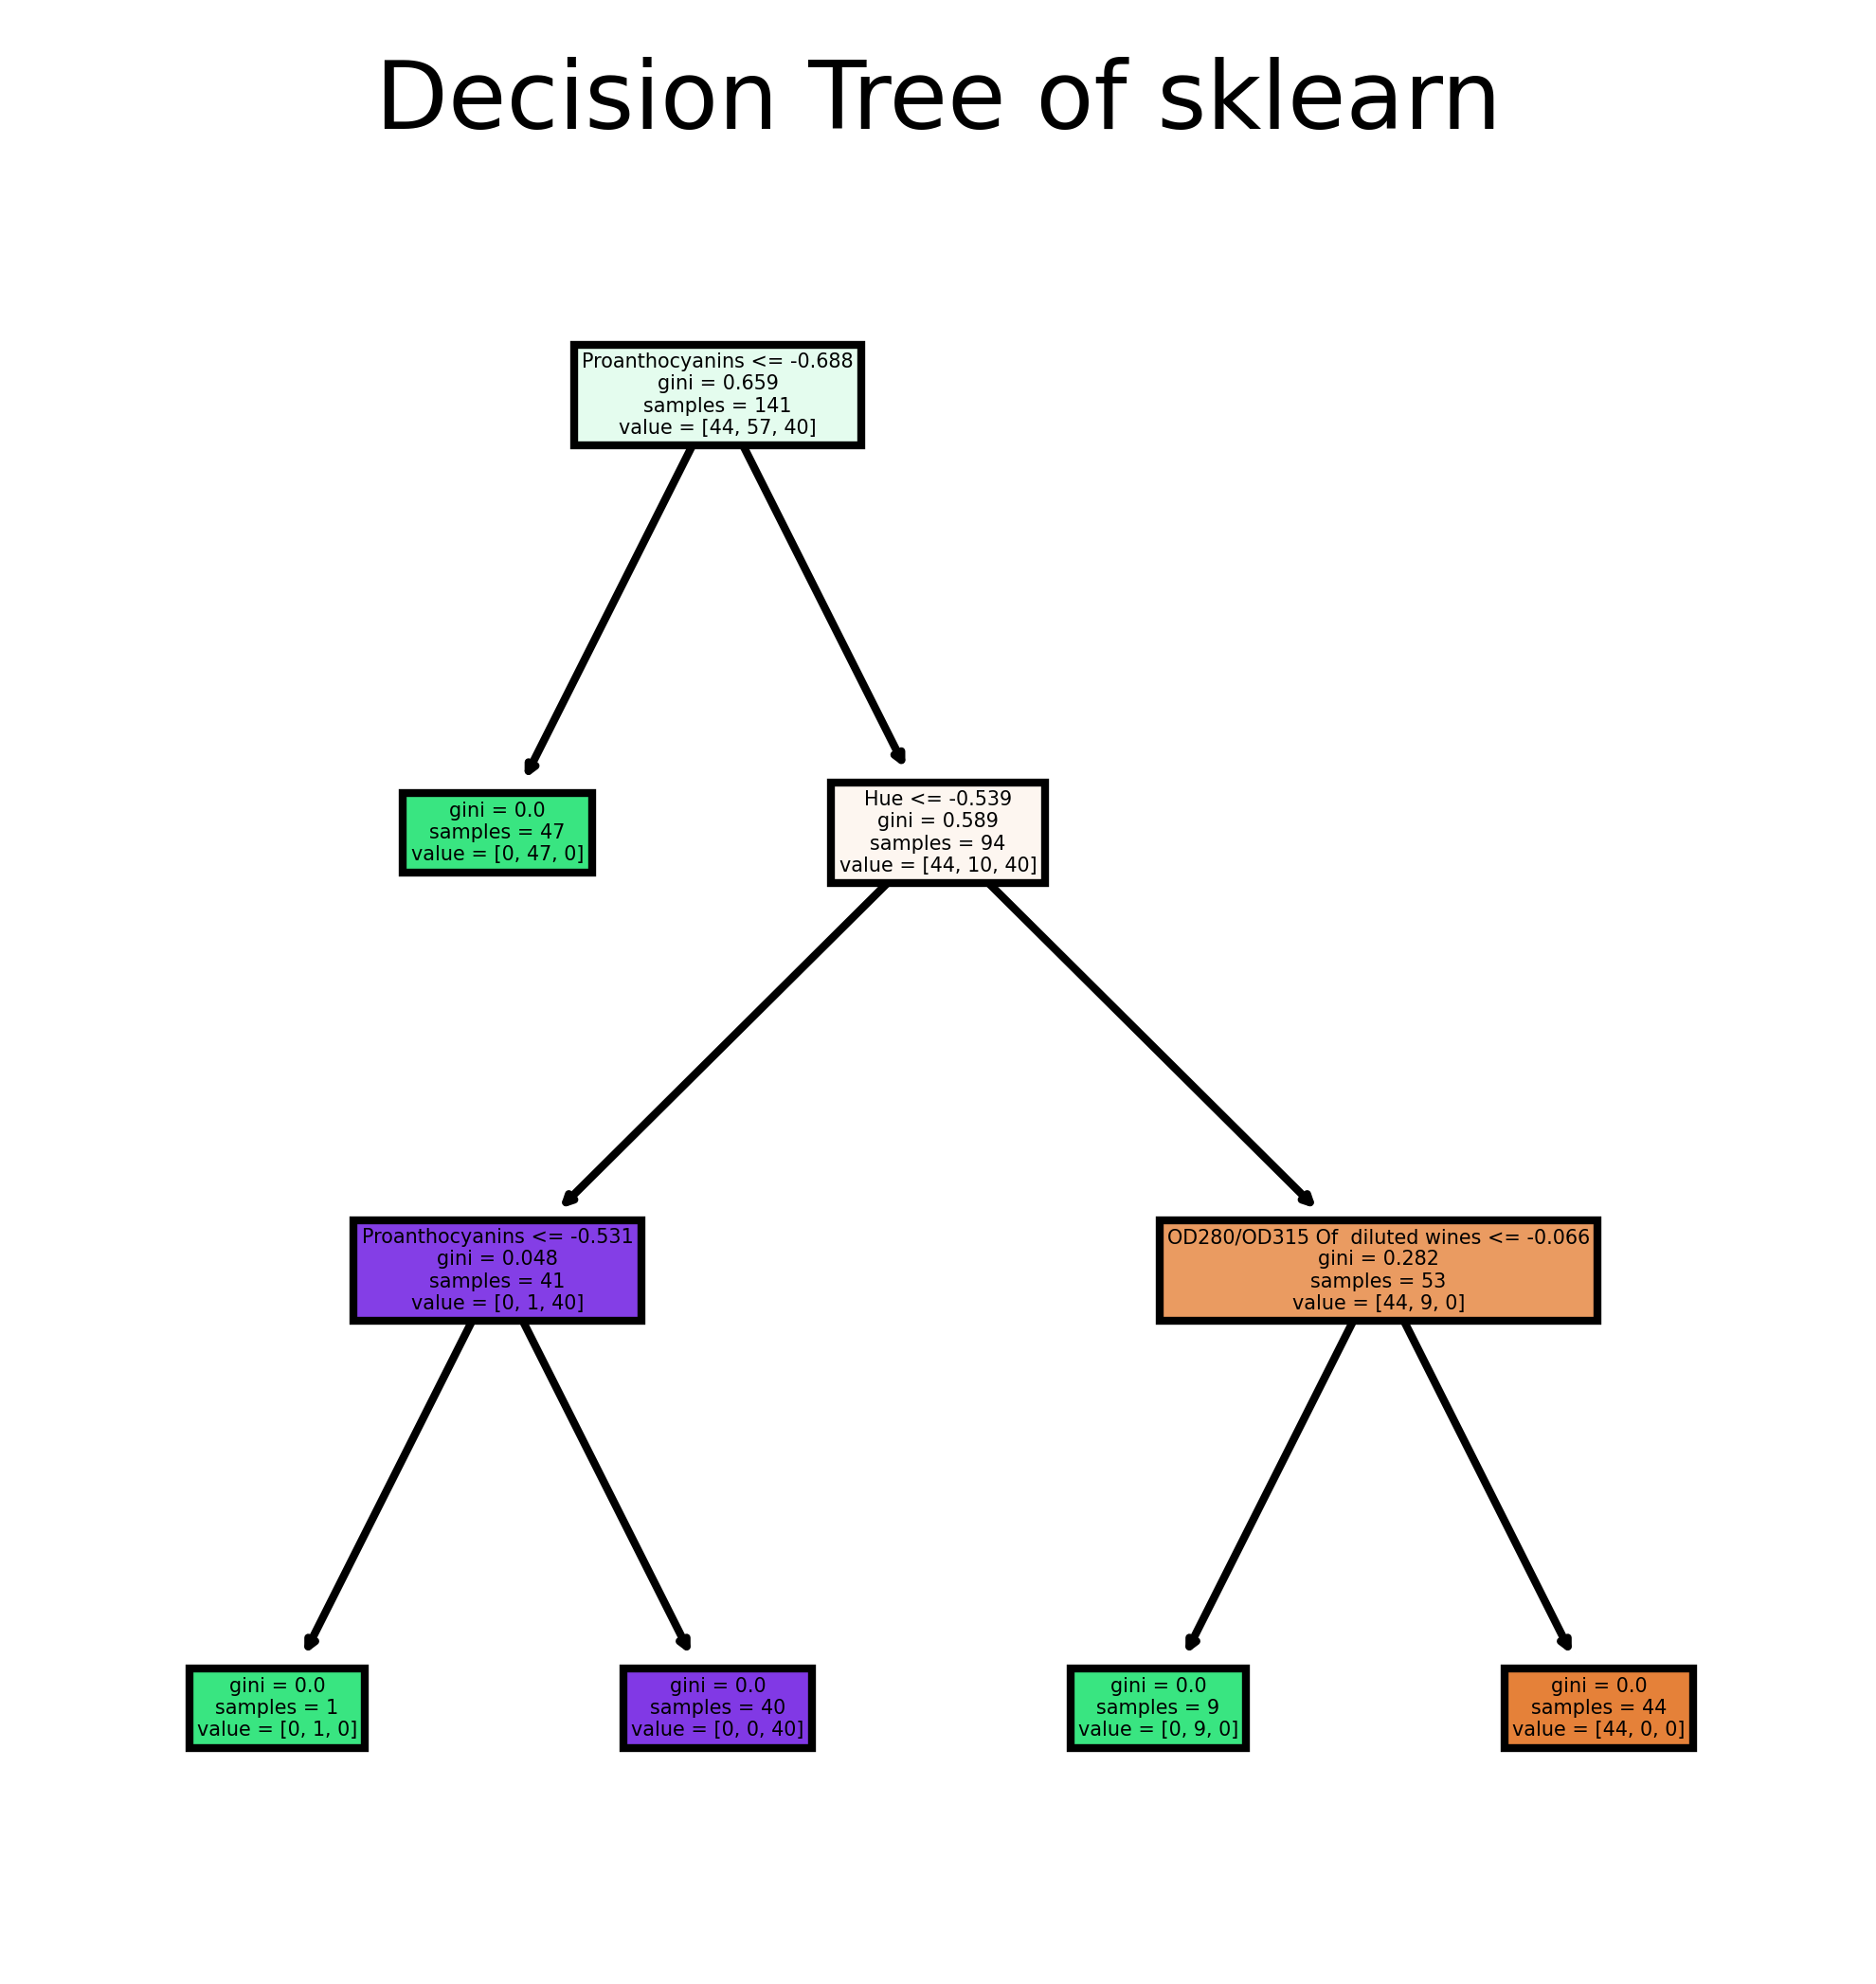

In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
tree.plot_tree(clf,feature_names = features, filled = True);
plt.title("Decision Tree of sklearn")